In [1]:
import numpy as np
import pandas as pd

stroke_norm_df = pd.read_csv('stroke_norm_df.csv',index_col=0)
stroke_norm_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,0.736842,0,1,1,1,0.801173,0.313507,1,0,1,0,0,1,0,0
1,51676,0,0.631579,0,0,1,0,0.678875,0.271375,1,0,0,1,0,0,1,0
2,31112,1,0.964912,0,1,1,0,0.234159,0.262701,1,0,1,0,0,0,1,0
3,60182,0,0.421053,0,0,1,1,0.535793,0.286245,1,0,1,0,0,0,0,1
4,1665,0,0.947368,1,0,1,0,0.549141,0.157373,1,0,0,1,0,0,1,0


In [2]:
from imblearn.combine import SMOTEENN 
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

X = stroke_norm_df.drop(['stroke','id'], axis=1)
y = stroke_norm_df['stroke']

#Oversampling
resample = SMOTEENN()

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42, stratify=y)

#Standardize
sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.fit_transform(X_test)

classifier = SVC(kernel='rbf')
classifier.fit(X_train_scaler,y_train)
y_pred = classifier.predict(X_test_scaler)

steps = [('r', resample),('m', classifier)]
pipeline = Pipeline(steps=steps)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores = cross_validate(pipeline, X_train_scaler, y_train, scoring=scoring, cv=cv, n_jobs=-1)

# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

#Classification Report
print(classification_report(y_test, y_pred))

Mean Accuracy: 0.7419
Mean Precision: 0.5346
Mean Recall: 0.6074
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1397
           1       0.00      0.00      0.00        99

    accuracy                           0.93      1496
   macro avg       0.47      0.50      0.48      1496
weighted avg       0.87      0.93      0.90      1496



/Users/yewandetaiwo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yewandetaiwo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yewandetaiwo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [24]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SVMSMOTE

svmsmote = SVMSMOTE(random_state = 101,k_neighbors=5,n_jobs=-1)
#svmsmote = SVMSMOTE(random_state = 101)

X_oversample_svm, y_oversample_svm = svmsmote.fit_resample(X_train, y_train)
#classifier_svm = LogisticRegression()
classifier_svm = SVC(kernel='linear')
classifier_svm.fit(X_oversample_svm, y_oversample_svm)
print(classification_report(y_test, classifier_svm.predict(X_test)))

print(confusion_matrix(y_test,classifier_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1397
           1       0.18      0.65      0.28        99

    accuracy                           0.78      1496
   macro avg       0.57      0.72      0.58      1496
weighted avg       0.92      0.78      0.83      1496

[[1106  291]
 [  35   64]]


(<Figure size 432x288 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.9291776412057361, 0.8225980209133477),
  ('0', '1'): (0.0,
   0.8259202800495603,
   0.9291776412057361,
   0.1740797199504396),
  ('1', '0'): (0.9341527655838456,
   0.0,
   0.06584723441615452,
   0.3926306251887647),
  ('1', '1'): (0.9341527655838456,
   0.39595288432497733,
   0.06584723441615452,
   0.6040471156750227)})

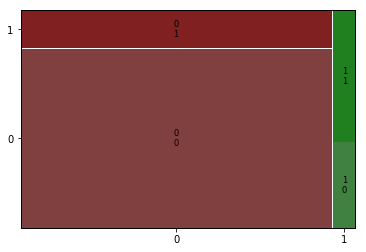

In [8]:
conf_matrix = confusion_matrix(y_test, classifier_svm.predict(X_test))
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)

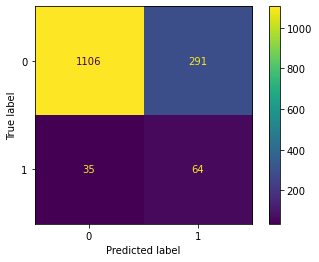

In [20]:
plot_confusion_matrix(classifier_svm, X_test, y_test)